In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from imblearn.over_sampling import SMOTE
import xgboost
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})

C:\Users\jothi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [39]:
pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [2]:
df = pd.read_csv('IPOfinal.csv')

In [29]:
df.columns

Index(['Unnamed: 0.3', 'Unnamed: 0', 'Date', 'IPO_Name', 'Issue_Size(crores)',
       'QIB', 'HNI', 'RII', 'Issue_price', 'Listing_Open', 'Listing_Close',
       'Listing_Gains(%)', 'CMP', 'Current_gains', 'Year', 'Unnamed: 0.1',
       'Unnamed: 0.2', 'Name', 'City', 'Country', 'Industry', 'Sector', 'Size',
       'Dividend / Share', 'Revenue from Operations / share',
       'Return on Networth / Equity (%)', 'Dividend Payout Ratio (NP) (%)',
       'Cash Earnings Retention Ratio (%)', 'Listing_Gains(%).1'],
      dtype='object')

In [30]:
df

,Unnamed: 0.3,Unnamed: 0,Date,IPO_Name,Issue_Size(crores),QIB,HNI,RII,Issue_price,Listing_Open,...,Country,Industry,Sector,Size,Dividend / Share,Revenue from Operations / share,Return on Networth / Equity (%),Dividend Payout Ratio (NP) (%),Cash Earnings Retention Ratio (%),Listing_Gains(%).1
0,0,0,26-11-2021,Tarsons Product,1030.22,1.06,3.40,2.49,662,700.0,...,India,Medical Instruments & Supplies,Healthcare,5515,1.00,150,3.00,4.00,5.00,26.89
1,1,1,23-11-2021,Latent View,622.11,145.48,850.66,119.44,197,530.0,...,India,Consulting Services,Industrials,1116,0.00,176.12,20.86,0.00,0.00,148.02
2,2,2,18-11-2021,Sapphire Foods,2073.00,3.11,2.34,5.25,1180,1311.0,...,India,Restaurants,Consumer Cyclical,10604,0.50,190,12.00,3.00,2.00,3.06
3,3,3,18-11-2021,One 97(Paytm),18915.90,2.79,0.24,1.66,2150,1955.0,...,India,Software-Infrastructure,Technology,32798,0.00,170,1.00,0.00,0.00,-27.25
4,4,4,15-11-2021,SJS Enterprises,816.57,1.42,2.32,1.38,542,514.0,...,India,Auto Parts,Consumer Cyclical,473,1.20,205,19.00,0.20,0.00,-5.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,73,73,11-04-2019,Rail Vikas,430.88,1.36,0.80,2.92,19,19.0,...,India,Engineering & Construction,Industrials,6368,0.09,48.25,16.22,29.77,70.50,0.26
74,74,74,01-04-2019,Embassy Office,4750.00,2.15,3.09,0.31,300,300.0,...,India,Engineering & Construction,Industrials,5515,1.50,201.11,11.85,12.84,89.85,4.70
75,75,75,29-03-2019,MSTC,213.81,1.13,2.15,2.95,128,111.0,...,India,Conglomerates,Industrials,6368,0.00,21,0.50,0.00,0.00,-10.78
76,76,76,07-02-2019,Chalet Hotels,1628.84,4.66,1.10,0.03,280,291.0,...,India,Lodging,Consumer Cyclical,1725,0.00,48.15,-0.70,0.00,0.00,3.71


In [3]:
df = df[['Year','Issue_Size(crores)','Issue_price','City', 'Country', 'Industry', 'Sector', 'Size','Dividend / Share', 'Revenue from Operations / share',
       'Return on Networth / Equity (%)', 'Dividend Payout Ratio (NP) (%)',
       'Cash Earnings Retention Ratio (%)','Listing_Gains(%)']]

In [32]:
df.dtypes

Year                                   int64
Issue_Size(crores)                   float64
Issue_price                            int64
City                                  object
Country                               object
Industry                              object
Sector                                object
Size                                   int64
Dividend / Share                     float64
Revenue from Operations / share       object
Return on Networth / Equity (%)      float64
Dividend Payout Ratio (NP) (%)       float64
Cash Earnings Retention Ratio (%)    float64
Listing_Gains(%)                     float64
dtype: object

In [33]:
print(df.describe())

              Year  Issue_Size(crores)  Issue_price          Size  \
count    78.000000           78.000000    78.000000     78.000000   
mean   2020.500000         1941.646667   530.705128   4447.474359   
std       0.768706         2888.006768   438.394684   4971.964431   
min    2019.000000            0.000000     0.000000     41.000000   
25%    2020.000000          502.500000   180.250000   1242.000000   
50%    2021.000000          808.285000   426.500000   3607.000000   
75%    2021.000000         2127.750000   752.250000   5465.250000   
max    2021.000000        18915.900000  2150.000000  32798.000000   

       Dividend / Share  Return on Networth / Equity (%)  \
count         78.000000                        78.000000   
mean           2.001282                        14.534103   
std            3.370327                        13.544972   
min            0.000000                       -11.420000   
25%            0.000000                         4.110000   
50%            0.6

In [4]:
def conv(x):
    if x>=0:
        return 'P'
    else:
        return 'L'

df['PL'] = df['Listing_Gains(%)'].apply(conv)

In [90]:
df['PL'].value_counts()

PL
P    55
L    23
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()
for column in ['City', 'Country','Industry','Sector','PL']:
    df[column] = label_encoder.fit_transform(df[column])

In [37]:

df['Sector'].value_counts()

Sector
0    15
2    14
6    13
4    13
5    10
8     5
1     4
3     2
9     1
7     1
Name: count, dtype: int64

In [38]:
print(df.isna().sum())

Year                                 0
Issue_Size(crores)                   0
Issue_price                          0
City                                 0
Country                              0
Industry                             0
Sector                               0
Size                                 0
Dividend / Share                     0
Revenue from Operations / share      0
Return on Networth / Equity (%)      0
Dividend Payout Ratio (NP) (%)       0
Cash Earnings Retention Ratio (%)    0
Listing_Gains(%)                     0
PL                                   0
dtype: int64


In [39]:
print(df.isnull().sum())

Year                                 0
Issue_Size(crores)                   0
Issue_price                          0
City                                 0
Country                              0
Industry                             0
Sector                               0
Size                                 0
Dividend / Share                     0
Revenue from Operations / share      0
Return on Networth / Equity (%)      0
Dividend Payout Ratio (NP) (%)       0
Cash Earnings Retention Ratio (%)    0
Listing_Gains(%)                     0
PL                                   0
dtype: int64


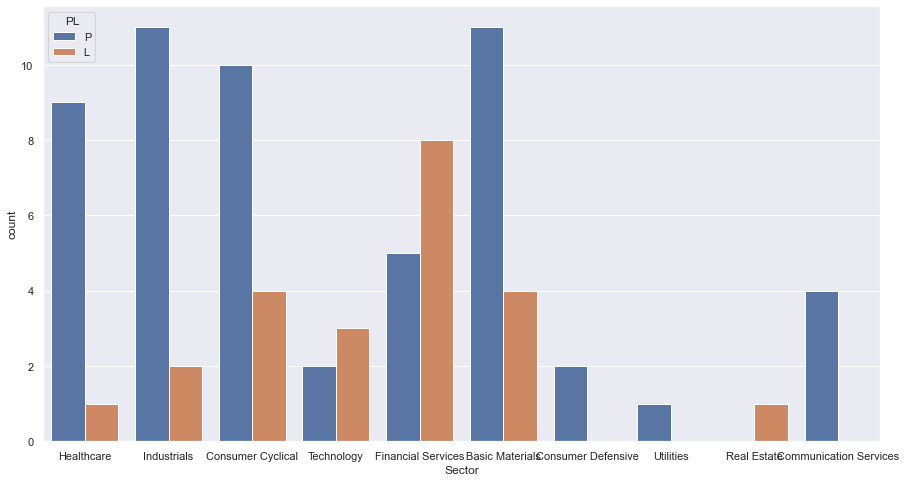

In [13]:
import matplotlib.pyplot as plt
sns.countplot(x='Sector',hue='PL',data=df)
plt.show()

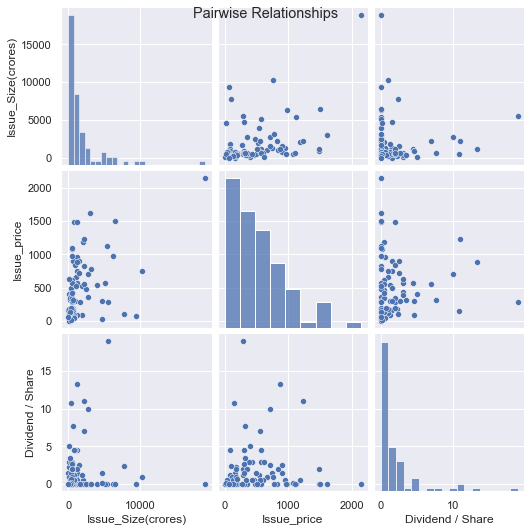

In [17]:
sns.pairplot(df[['Issue_Size(crores)', 'Issue_price', 'Dividend / Share', 'Revenue from Operations / share']])
plt.suptitle('Pairwise Relationships')
plt.show()


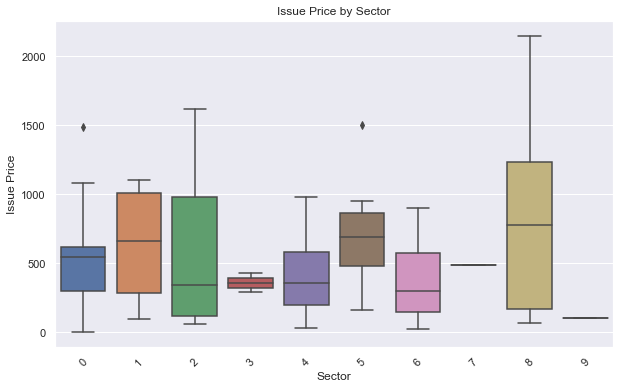

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Sector', y='Issue_price')
plt.title('Issue Price by Sector')
plt.xlabel('Sector')
plt.ylabel('Issue Price')
plt.xticks(rotation=45)
plt.show()


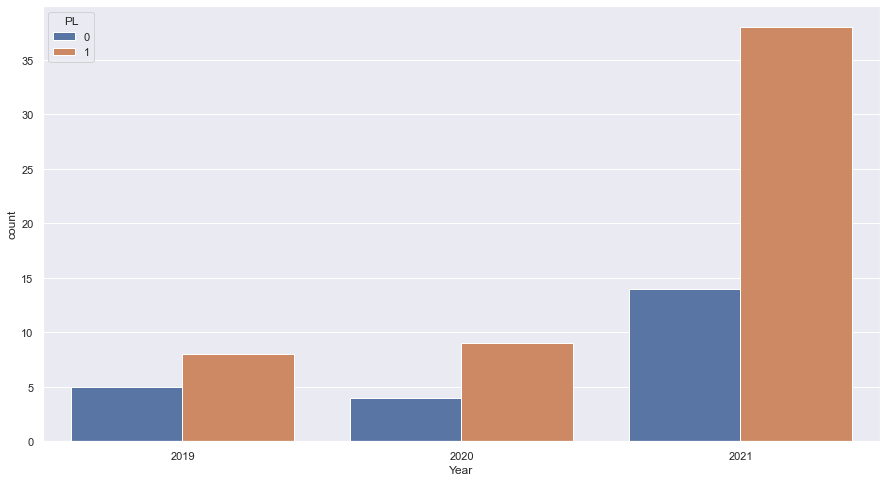

In [19]:
sns.countplot(x='Year',hue='PL',data=df)
plt.show()

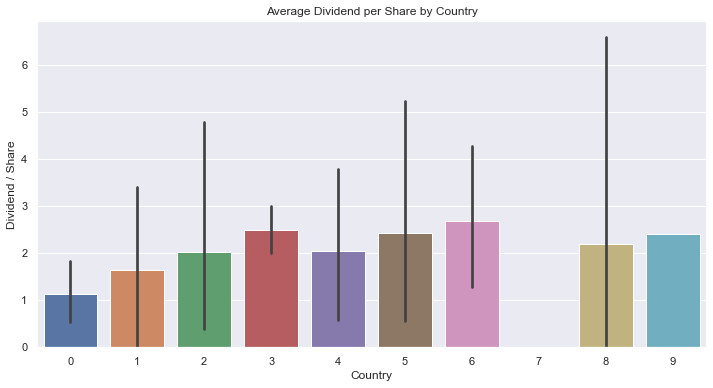

In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Sector', y='Dividend / Share')
plt.title('Average Dividend per Share by Country')
plt.xlabel('Country')
plt.ylabel('Dividend / Share')
plt.show()


<AxesSubplot:xlabel='PL', ylabel='Issue_Size(crores)'>

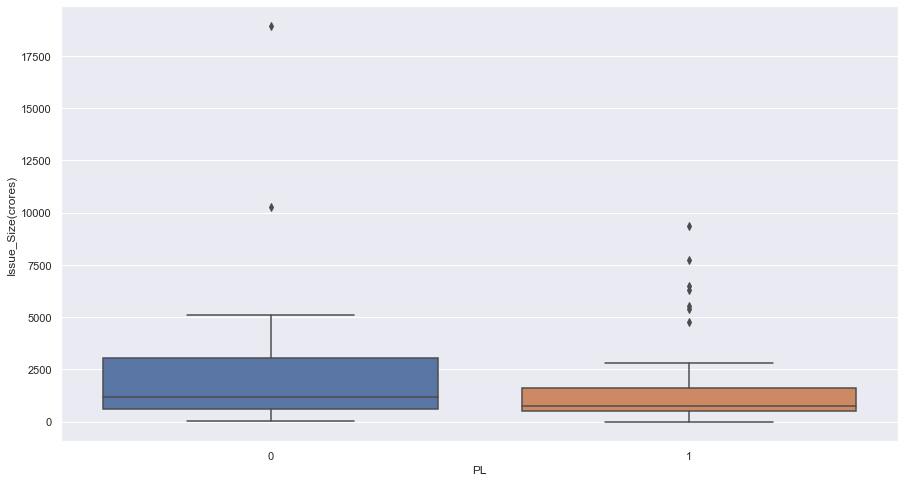

In [21]:
sns.boxplot(x='PL', y='Issue_Size(crores)', data=df)

In [6]:
df=df.drop(['Listing_Gains(%)'], axis=1)
df=df.drop(['Year'], axis=1)

In [7]:
def conv2(x):
    l=list(x)
    if "," in l:
        l.remove(',')
    y=''.join(l)
    return float(y)

df['Revenue from Operations / share'] = df['Revenue from Operations / share'].apply(conv2)

In [78]:
df.dtypes

Issue_Size(crores)                   float64
Issue_price                            int64
City                                   int32
Country                                int32
Industry                               int32
Sector                                 int32
Size                                   int64
Dividend / Share                     float64
Revenue from Operations / share      float64
Return on Networth / Equity (%)      float64
Dividend Payout Ratio (NP) (%)       float64
Cash Earnings Retention Ratio (%)    float64
PL                                     int32
dtype: object

In [17]:
label_encoder = LabelEncoder()
for column in ['City', 'Country','Industry','Sector','PL']:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.dtypes

Issue_Size(crores)                   float64
Issue_price                            int64
City                                   int32
Country                                int32
Industry                               int32
Sector                                 int32
Size                                   int64
Dividend / Share                     float64
Revenue from Operations / share      float64
Return on Networth / Equity (%)      float64
Dividend Payout Ratio (NP) (%)       float64
Cash Earnings Retention Ratio (%)    float64
PL                                     int32
dtype: object

<AxesSubplot:>

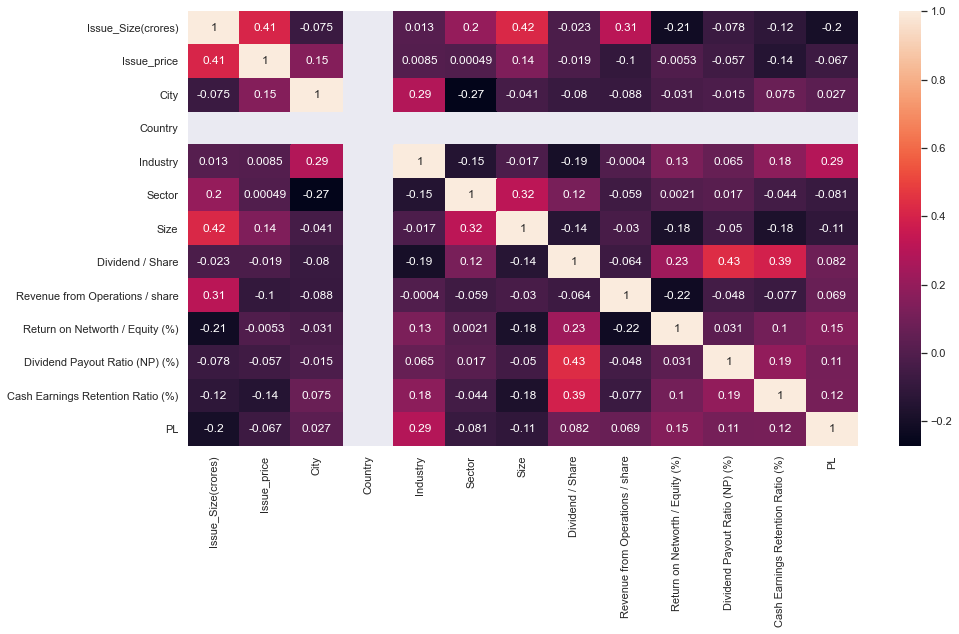

In [21]:
cor=df.corr()
sns.heatmap(cor,annot=True)

In [8]:
y=df['PL']
X=df.drop(['PL'],axis=1)

In [9]:
augmented_X_train, X_test, augmented_y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [10]:
augmented_X_train = augmented_X_train.to_numpy()
augmented_y_train = augmented_y_train.to_numpy()

In [11]:
def perform_data_augmentation(X, y, num_samples=100):
    augmented_X = []
    augmented_y = []
    
    for i in range(len(X)):
        for _ in range(num_samples):
            augmented_X.append(X[i] + np.random.normal(0, 0.1, size=X[i].shape))
            augmented_y.append(y[i])
    
    return np.array(augmented_X), np.array(augmented_y)

In [12]:
augmented_X_train, augmented_y_train = perform_data_augmentation(augmented_X_train, augmented_y_train)

In [13]:
counts = np.bincount(augmented_y_train)
counts

array([1600, 3800], dtype=int64)

In [14]:
smote = SMOTE(random_state=42)
augmented_X_train, augmented_y_train = smote.fit_resample(augmented_X_train, augmented_y_train)

In [15]:
counts = np.bincount(augmented_y_train)
counts

array([3800, 3800], dtype=int64)

In [36]:
#numerical_features = ['Year', 'Issue_Size(crores)','Issue_price','Size ','Dividend / Share ','Revenue from Operations / share ','Return on Networth / Equity (%) ','Dividend Payout Ratio (NP) (%)','Cash Earnings Retention Ratio (%)']

In [24]:
augmented_X_train

,Issue_Size(crores),Issue_price,City,Country,Industry,Sector,Size,Dividend / Share,Revenue from Operations / share,Return on Networth / Equity (%),Dividend Payout Ratio (NP) (%),Cash Earnings Retention Ratio (%)
0,600.000000,130,9,0,37,0,874,0.500000,60.910000,11.730000,6.420000,95.310000
1,5089.290000,570,9,0,6,0,2949,0.000000,184.240000,0.300000,0.000000,0.700000
2,510.000000,187,11,0,41,2,4862,2.000000,9.820000,37.660000,0.000000,0.000000
3,412.630000,385,1,0,19,2,5316,3.000000,58.000000,14.000000,1.000000,1.000000
4,4633.000000,26,11,0,12,4,41,0.200000,75.000000,3.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
71,646.454937,390,12,0,37,0,2186,0.718356,110.632412,8.366039,5.144465,40.151281
72,15589.871208,1612,9,0,26,6,21953,0.385417,142.554491,9.594788,0.000000,0.000000
73,592.345412,309,10,0,5,4,4661,0.071848,54.071394,2.984034,0.001597,0.017563
74,3521.221002,544,4,0,7,0,1240,1.616257,89.068503,6.180159,5.169713,19.189816


In [51]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(augmented_X_train, augmented_y_train)


y_pred = logistic_regression_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


print(classification_report(y_test, y_pred))


Accuracy: 0.46
              precision    recall  f1-score   support

           0       0.20      0.29      0.24         7
           1       0.64      0.53      0.58        17

    accuracy                           0.46        24
   macro avg       0.42      0.41      0.41        24
weighted avg       0.51      0.46      0.48        24



C:\Users\jothi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier = DecisionTreeClassifier(random_state=42)
decision_tree_classifier.fit(augmented_X_train, augmented_y_train)

y_pred3 = decision_tree_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred3))

Accuracy: 0.58
              precision    recall  f1-score   support

           0       0.36      0.57      0.44         7
           1       0.77      0.59      0.67        17

    accuracy                           0.58        24
   macro avg       0.57      0.58      0.56        24
weighted avg       0.65      0.58      0.60        24



In [129]:
from sklearn.neighbors import RandomForestClassifier
random_forest_classifier = RandomForestClassifier(n_estimators=2, random_state=200)
random_forest_classifier.fit(augmented_X_train, augmented_y_train)
y_pred2 = random_forest_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred2))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.75      0.71      0.73        17

    accuracy                           0.62        24
   macro avg       0.56      0.57      0.56        24
weighted avg       0.64      0.62      0.63        24



In [71]:
from xgboost import XGBClassifier
model3 = XGBClassifier(n_estimators=30, max_depth=2, learning_rate=0.02, random_state=2)
model3.fit(augmented_X_train, augmented_y_train)
from sklearn.metrics import accuracy_score

y_pred5 = model3.predict(X_test)
y_train_pred = model3.predict(augmented_X_train)

test_accuracy = accuracy_score(y_test, y_pred5)
print("Test Accuracy:", test_accuracy)
train_accuracy = accuracy_score(augmented_y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print(classification_report(y_test, y_pred5))
print(f"Accuracy: {accuracy:.2f}")

Test Accuracy: 0.7916666666666666
Training Accuracy: 0.8905263157894737
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       0.88      0.82      0.85        17

    accuracy                           0.79        24
   macro avg       0.75      0.77      0.76        24
weighted avg       0.80      0.79      0.80        24

Accuracy: 0.83


In [45]:
from sklearn.model_selection import cross_val_score
model4 = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)

cross_val_scores = cross_val_score(model4, augmented_X_train, augmented_y_train, cv=5, scoring='accuracy')
model4.fit(augmented_X_train, augmented_y_train)
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Score:", np.mean(cross_val_scores))
y_pred6 = model4.predict(X_test)
y_train_pred = model4.predict(augmented_X_train)

test_accuracy = accuracy_score(y_test, y_pred6)
print("Test Accuracy:", test_accuracy)
train_accuracy = accuracy_score(augmented_y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)
print(classification_report(y_test, y_pred6))
print(f"Accuracy: {accuracy:.2f}")


Cross-Validation Scores: [0.86578947 0.86842105 0.93421053 0.86842105 0.86842105]
Mean CV Score: 0.8810526315789474
Test Accuracy: 0.8333333333333334
Training Accuracy: 1.0
              precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.88      0.88      0.88        17

    accuracy                           0.83        24
   macro avg       0.80      0.80      0.80        24
weighted avg       0.83      0.83      0.83        24

Accuracy: 0.83


In [32]:
import pickle
Pkl_Filename = "IPOmodel.pkl"  
pickle.dump(model4, open(Pkl_Filename, 'wb'))

In [33]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_LR_Model = pickle.load(file)

Pickled_LR_Model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [34]:
model_filename = "IPOmodel.pkl"

# Load the model from the pickle file
with open(model_filename, 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Now you can use the loaded model to make predictions
loaded_predictions = loaded_model.predict([[103 ,345, 34, 0, 43, 432, 21,5432,2,323,2,32]])

# Example: Printing the loaded predictions
print("Loaded Predictions:")
print(loaded_predictions)


Loaded Predictions:
[1]
